This notebook shows example of testing "JPEG" defense on Koncept metric and three attacks (['cadv', 'fgsm', 'uap'])
* metrics folder contains all scripts
* sample_data folder contains adversarial images for further processing using defense
* res folder contains results of code execution

In [1]:
!git clone https://github.com/msu-video-group/adversarial-defenses-for-iqa.git

Cloning into 'adversarial-defenses-for-iqa'...
remote: Enumerating objects: 561, done.
remote: Counting objects: 100% (561/561), done.
remote: Compressing objects: 100% (410/410), done.
remote: Total 561 (delta 125), reused 553 (delta 121), pack-reused 0
Receiving objects: 100% (561/561), 2.14 MiB | 10.28 MiB/s, done.
Resolving deltas: 100% (125/125), done.


In [2]:
cd /content/adversarial-defenses-for-iqa

/content/adversarial-defenses-for-iqa


In [3]:
!pip install av

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 11.2 MB/s eta 0:00:00


In [4]:
import warnings
warnings.filterwarnings('ignore')
import gdown
import zipfile
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
url = 'https://drive.google.com/uc?id=1p-aUCzq0_TU0txApohFCQxcvCueEgqEr'
output = 'sample_data.zip'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1p-aUCzq0_TU0txApohFCQxcvCueEgqEr
From (redirected): https://drive.google.com/uc?id=1p-aUCzq0_TU0txApohFCQxcvCueEgqEr&confirm=t&uuid=6d098455-a34f-4c8c-8ae6-dee2b55f3325
To: /content/adversarial-defenses-for-iqa/sample_data.zip
100%|██████████| 441M/441M [00:05<00:00, 79.8MB/s]


'sample_data.zip'

In [6]:
with zipfile.ZipFile("sample_data.zip","r") as zip_ref:
    zip_ref.extractall("./")

In [7]:
cd metrics

/content/adversarial-defenses-for-iqa/metrics


In [8]:
from subjects.koncept.src.model import MetricModel

In [9]:
model = MetricModel(device='cpu', model_path='../sample_data/KonCept512.pth', backbone_path='../sample_data/inceptionresnetv2-520b38e4.pth')

In [10]:
cd defences

/content/adversarial-defenses-for-iqa/metrics/defences


In [11]:
cd utils

/content/adversarial-defenses-for-iqa/metrics/defences/utils


In [12]:
import defence_evaluate
from defence_evaluate import *

In [13]:
cd ../..

/content/adversarial-defenses-for-iqa/metrics


In [14]:
from defences.jpeg.run import Defence

In [15]:
defence_obj = Defence()

In [16]:
dump_path = '../res/'
batch_size = 1

In [17]:
attacks = ['cadv', 'fgsm', 'uap']

In [20]:
image_num = '319557469'
image_idx = 0

JPEG defence, cadv attack


100%|██████████| 10/10 [00:56<00:00,  5.60s/it]


Example:


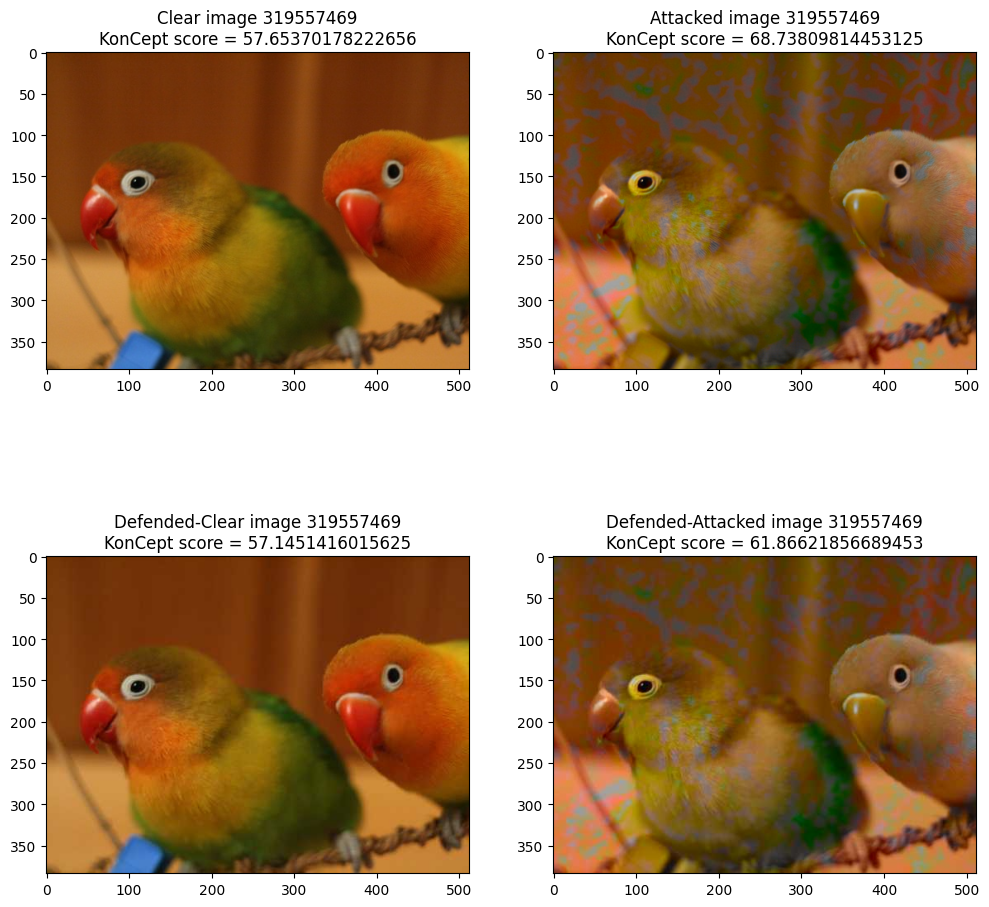

JPEG defence, fgsm attack


100%|██████████| 10/10 [00:56<00:00,  5.68s/it]


Example:


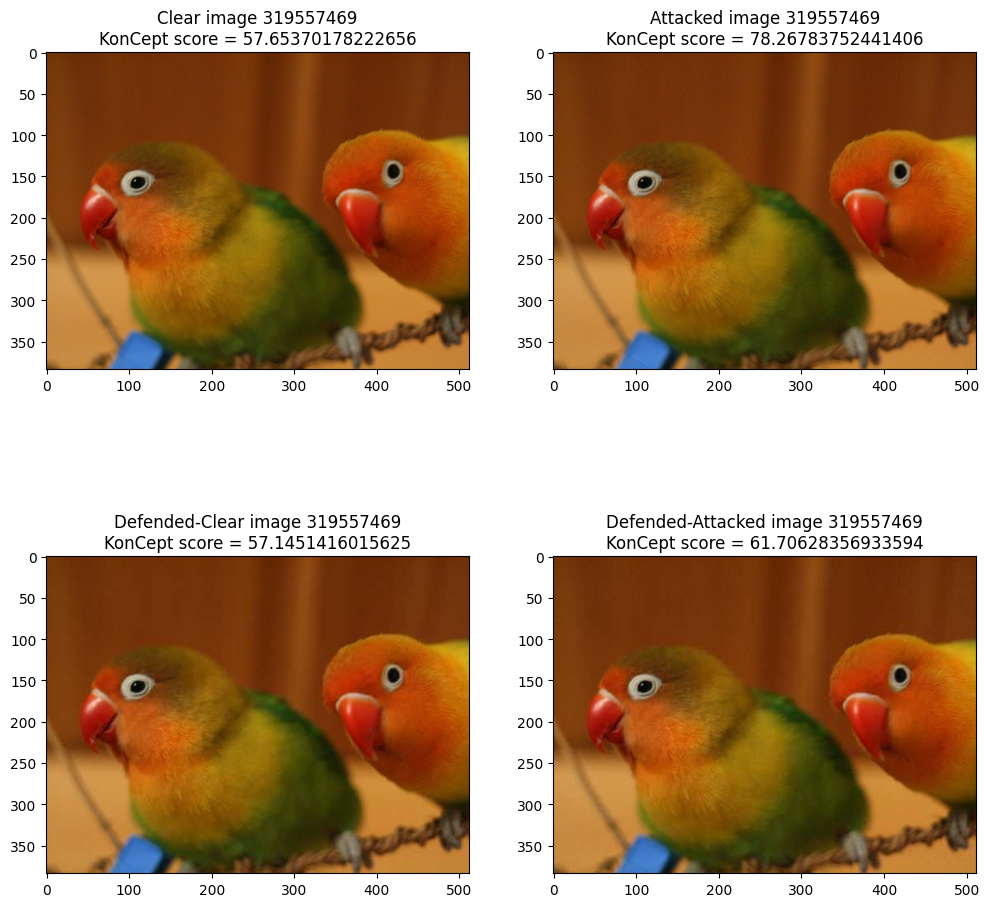

JPEG defence, uap attack


100%|██████████| 10/10 [00:57<00:00,  5.72s/it]


Example:


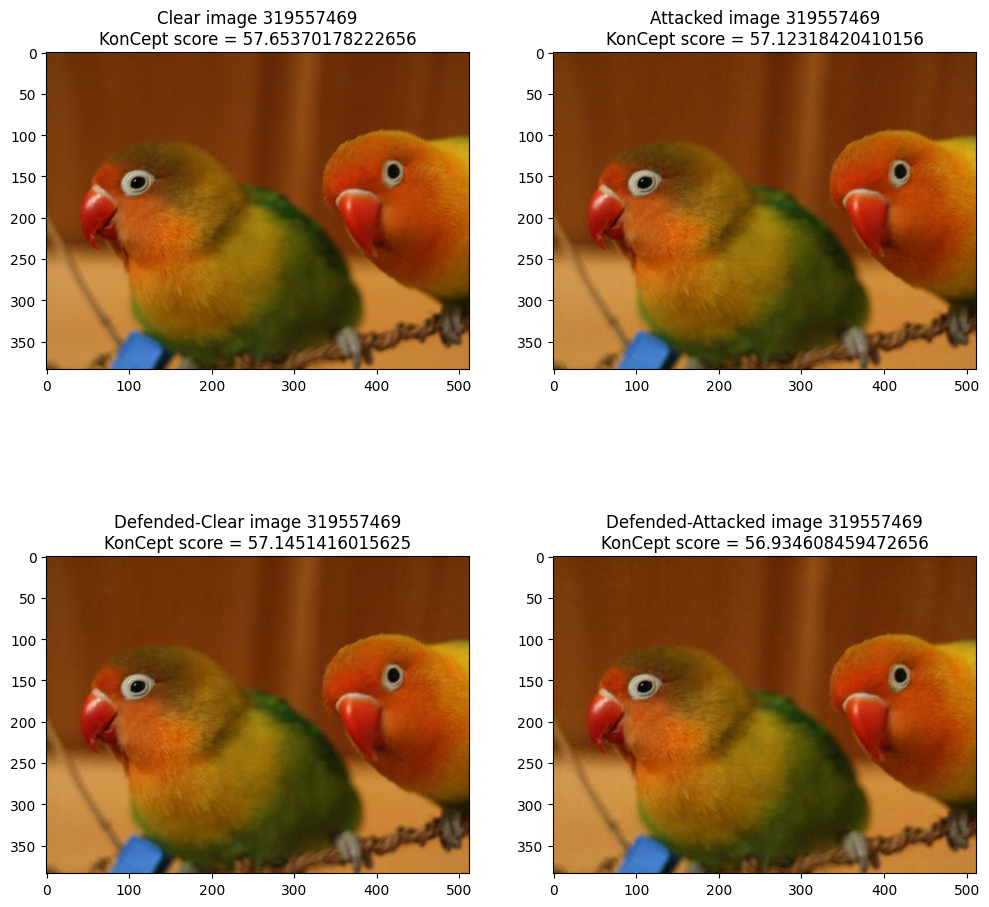

In [21]:
for att in attacks:
    print('JPEG defence, '+att+' attack')
    cur_dataset = KoniqAttackedDataset(src_dir='../sample_data/noattack/', dest_dir='../sample_data/'+att, mos_path='../sample_data/koniq10k_scores_and_distributions.csv', return_mos=True)
    cur_dloader = DataLoader(cur_dataset, batch_size=batch_size, shuffle=False)
    df = run(defence=defence_obj, model=model, dataloader=cur_dloader, is_fr=False, device='cpu', dump_path=dump_path+att, dump_freq=500, save_freq=-1, defence_preset=-1, dataset_save_path=None, atk_name=att)
    df[0].to_csv(dump_path+att+'_sample_res.csv')
    im_attacked = cv2.imread(dump_path+'/'+att+'/'+'attacked_'+att+'_'+image_num+'.png')
    im_attacked = cv2.cvtColor(im_attacked, cv2.COLOR_BGR2RGB)
    im_clear = cv2.imread(dump_path+'/'+att+'/'+'clear_'+att+'_'+image_num+'.png')
    im_clear = cv2.cvtColor(im_clear, cv2.COLOR_BGR2RGB)
    im_defended_attacked = cv2.imread(dump_path+'/'+att+'/'+'defended-attacked_'+att+'_'+image_num+'.png')
    im_defended_attacked = cv2.cvtColor(im_defended_attacked, cv2.COLOR_BGR2RGB)
    im_defended_clear = cv2.imread(dump_path+'/'+att+'/'+'defended-clear_'+att+'_'+image_num+'.png')
    im_defended_clear = cv2.cvtColor(im_defended_clear, cv2.COLOR_BGR2RGB)
    print('Example:')
    fig, ax = plt.subplots(2, 2, figsize=(12, 12))
    ax[0][0].set_title('Clear image '+image_num+'\nKonCept score = '+str(df[0].iloc[image_idx]['clear']))
    ax[0][0].imshow(im_clear)
    ax[0][1].set_title('Attacked image '+image_num+'\nKonCept score = '+str(df[0].iloc[image_idx]['attacked']))
    ax[0][1].imshow(im_attacked)
    ax[1][0].set_title('Defended-Clear image '+image_num+'\nKonCept score = '+str(df[0].iloc[image_idx]['defended-clear']))
    ax[1][0].imshow(im_defended_clear)
    ax[1][1].set_title('Defended-Attacked image '+image_num+'\nKonCept score = '+str(df[0].iloc[image_idx]['defended-attacked']))
    ax[1][1].imshow(im_defended_attacked)
    plt.show()

In [22]:
print('CSV file example')
att = 'cadv'
df = pd.read_csv(dump_path+att+'_sample_res.csv')
df.head()

CSV file example


,Unnamed: 0,image_name,clear,attacked,defended-clear,defended-attacked,mos,ssim_clear_defended-clear,mse_clear_defended-clear,psnr_clear_defended-clear,...,ssim_attacked_defended-attacked,mse_attacked_defended-attacked,psnr_attacked_defended-attacked,l_inf_attacked_defended-attacked,mae_attacked_defended-attacked,ssim_defended-clear_defended-attacked,mse_defended-clear_defended-attacked,psnr_defended-clear_defended-attacked,l_inf_defended-clear_defended-attacked,mae_defended-clear_defended-attacked
0,0,319557469.jpg,57.653702,68.738098,57.145142,61.866219,3.169811,0.925722,0.000150,38.226155,...,0.871073,0.000398,34.006389,0.215686,0.013846,0.672213,0.010116,19.950112,0.827451,0.069236
1,1,307525026.jpg,52.897980,65.115410,50.896965,59.212639,3.315315,0.919339,0.000544,32.640955,...,0.897227,0.000603,32.197406,0.278431,0.016086,0.799853,0.007117,21.477096,0.596078,0.048856
2,2,135403304.jpg,40.681412,54.082382,38.337944,48.106895,1.970588,0.939288,0.000089,40.518210,...,0.858832,0.000162,37.903803,0.156863,0.008592,0.751118,0.001106,29.561613,0.298039,0.020209
3,3,452715885.jpg,58.149193,62.988358,57.801376,61.172653,3.127451,0.876800,0.002453,26.103663,...,0.913762,0.001926,27.152742,0.364706,0.031193,0.790927,0.026885,15.704902,0.976471,0.082174
4,4,346617303.jpg,40.038597,54.312019,38.817856,48.509399,2.247619,0.863523,0.000367,34.347496,...,0.848114,0.000466,33.317792,0.243137,0.015469,0.679723,0.009439,20.250625,0.905882,0.060329
